<a href="https://colab.research.google.com/github/VladislavTumanov/bookish-computing-machine/blob/main/Cell_image_conclusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, GRU, SimpleRNN, Input, Embedding
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import re

In [ ]:
import math

n, s = map(int, input().split())
scores = []
for i in range(n):
    l, r = map(int, input().split())
    scores.append((l+r)//2)

scores.sort()
prefix_sum = [0]
for i in range(n):
    prefix_sum.append(prefix_sum[-1] + scores[i])

max_median = 0
for i in range(n):
    left = i+1
    right = n
    while left <= right:
        mid = (left+right)//2
        total_points = prefix_sum[mid] - prefix_sum[i]
        if total_points + scores[i]*(mid-i) <= s:
            max_median = max(max_median, scores[mid-1])
            left = mid+1
        else:
            right = mid-1

print(max_median)


3 27
11 14
2 10
11 14
12


In [ ]:
n = int(input())
a = list(map(int, input().split()))
for l in range(n, 1, -1):
    count = {}
    count_count = {}
    max_count = 0
    for i in range(l):
        count[a[i]] = count.get(a[i], 0) + 1
        count_count[count[a[i]]] = count_count.get(count[a[i]], 0) + 1
        max_count = max(max_count, count[a[i]])
    if len(count_count) <= 2 and (len(count_count) == 1 or (len(count_count) == 2 and count_count[max_count] == 1 and count_count[max_count-1] == len(count_count)-1)):
        print(l)
        break
else:
    print(2)


10
1 2 4 2 3 1 3 9 15 23
3


In [ ]:
n = int(input())
a = list(map(int, input().split()))

for l in range(n, 1, -1):
    count = {}
    count_count = {}
    max_count = 0
    for i in range(l):
        count[a[i]] = count.get(a[i], 0) + 1
        count_count[count[a[i]]] = count_count.get(count[a[i]], 0) + 1
        max_count = max(max_count, count[a[i]])
    if len(count_count) <= 2 and (len(count_count) == 1 or (len(count_count) == 2 and count_count[max_count] == 1 and count_count[max_count-1] == len(count_count)-1)):
        print(l)
        break
else:
    print(2)



10
1 2 4 2 3 1 3 9 15 23
3


In [ ]:
1 2 4 2 3 1 3 9 15 23n = 5
a = [1, 2, 3, 4, 5]

for l in range(2, n+1):
    count = {}
    max_count = 0
    for i in range(l):
        count[a[i]] = count.get(a[i], 0) + 1
        max_count = max(max_count, count[a[i]])
    if len(count) == max_count + 1:
        print(l)
        break
else:
  print(2)


2


In [ ]:
n = int(input())
s = input()

# Словарь, где ключами являются символы, а значениями - индексы последнего вхождения этого символа в строку s.
last_occurrence = {'a': -1, 'b': -1, 'c': -1, 'd': -1}

# Переменная для хранения длины текущей хорошей подстроки.
current_len = float('inf')

# Переменные-указатели на начало и конец текущей хорошей подстроки.
start = 0
end = -1

for i, char in enumerate(s):
    last_occurrence[char] = i
    # Если все символы уже встречались в строке, идем к следующему началу подстроки.
    if min(last_occurrence.values()) > -1:
        # Ищем новое начало подстроки.
        min_last_occurrence = min(last_occurrence.values())
        if i - min_last_occurrence < current_len:
            current_len = i - min_last_occurrence
            start = min_last_occurrence + 1  # Увеличиваем start на единицу.
            end = i
    # Если после обработки текущего символа не все символы встречались в строке,
    # то продолжаем двигать указатель end до тех пор, пока все символы не будут найдены,
    # или до конца строки.
    elif i == len(s) - 1:
        current_len = -1
    else:
        continue

if current_len == float('inf'):
    current_len = -1

if current_len != -1:
  print(current_len+1)

else:
  print


7
dbbccca
7


In [ ]:
n = int(input())
a = list(map(int, input().split()))


freq = {}
freq_count = {}

for i in range(n):
    freq[a[i]] = freq.get(a[i], 0) + 1
    freq_count[freq[a[i]]] = freq_count.get(freq[a[i]], 0) + 1

if len(freq_count) <= 2:
    print(n)
else:
    for l in range(n-1, 1, -1):
        freq[a[l]] -= 1
        if freq[a[l]] == 0:
            del freq[a[l]]
        freq_count[freq[a[l-1]]] -= 1
        if freq_count[freq[a[l-1]]] == 0:
            del freq_count[freq[a[l-1]]]
        if len(freq_count) <= 2 and (len(freq_count) == 1 or (len(freq_count) == 2 and 1 in freq_count.values())):
            print(l)
            break
    else:
        print(2)


13
1 2 3 1 2 2 3 3 3 1 4 4 5
5


In [ ]:
n = int(input())
a = list(map(int, input().split()))

prefix_sum = [0] * (n+1)
for i in range(n):
    prefix_sum[i+1] = prefix_sum[i] + a[i]

count = 0
sums = {}

for j in range(n+1):
    if prefix_sum[j] == 0:
        count += 1
    if prefix_sum[j] in sums:
        count += len(sums[prefix_sum[j]])
        sums[prefix_sum[j]].append(j)
    else:
        sums[prefix_sum[j]] = [j]

print(count)
# 42 -42 42

4
1 2 3 -6
3


In [ ]:
n = int(input())
a = list(map(int, input().split()))

prefix_sum = [0] * (n+1)
for i in range(n):
    prefix_sum[i+1] = prefix_sum[i] + a[i]

count = 0
sums = {}

for j in range(n+1):
    if prefix_sum[j] == 0:
        count += 1
    if prefix_sum[j] in sums:
        count += len(sums[prefix_sum[j]])
        sums[prefix_sum[j]].append(j)
    else:
        sums[prefix_sum[j]] = [j]

normal_count = 0

for i in range(n):
    for j in range(i, n):
        s = prefix_sum[j+1] - prefix_sum[i]
        if s in sums and any(l > i for l in sums[s]):
            normal_count += 1
            break

print(normal_count)

3
42 -42 42
3


In [ ]:
n = int(input())
a = list(map(int, input().split()))
ans = 1
count = 1

for i in range(n-1):
    if a[i] == a[i+1]:
        count += 1
    else:
        ans = max(ans, count)
        count = 1

ans = max(ans, count)

if set(a) == {0}:
    print(n)
elif set(a) == {1}:
    print(n)
else:
    print(ans)

13
1 2 3 1 2 2 3 3 3 1 4 4 5
3


In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d iarunava/cell-images-for-detecting-malaria
! unzip /content/cell-images-for-detecting-malaria.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


KeyboardInterrupt: ignored

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=30,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True,
    zoom_range = 0.2,
    validation_split  = 0.2)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
batch_size = 32
weight,height = 64, 64

In [ ]:
train_data = train_datagen.flow_from_directory(
    directory = '/content/cell_images/test',
    target_size = (weight,height),
    batch_size = batch_size,
    class_mode = 'binary',
    subset = 'training'
    )
valid_data = train_datagen.flow_from_directory(
    directory = '/content/cell_images/test',
    target_size = (weight,height),
    batch_size = batch_size,
    class_mode = 'binary',
    subset = 'validation'
)
test_data = test_datagen.flow_from_directory(
    directory = '/content/cell_images/train',
    class_mode = 'binary',
    batch_size = batch_size,
    target_size = (weight,height)
)

Found 22048 images belonging to 2 classes.
Found 5510 images belonging to 2 classes.
Found 27558 images belonging to 2 classes.


In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape = (weight,height,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D((2,2), strides = (2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D((2,2), strides = (2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D((2,2), strides = (2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation = 'sigmoid'))

NameError: ignored

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 dropout_40 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_31 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 dropout_41 (Dropout)        (None, 16, 16, 64)      

In [ ]:
opt = Adam(learning_rate= 0.001)
model.compile(
    metrics = ['accuracy'],
    optimizer = opt,
    loss = 'binary_crossentropy'
)

In [ ]:
early_stop = EarlyStopping(monitor = 'val_accuracy', patience = 5, mode = 'max')
train_attempt = model.fit(train_data, epochs = 10, validation_data = valid_data, callbacks=[early_stop])

Epoch 1/10
689/689 [==============================] - 176s 254ms/step - loss: 0.3360 - accuracy: 0.8691 - val_loss: 0.2518 - val_accuracy: 0.9176
Epoch 2/10
689/689 [==============================] - 180s 261ms/step - loss: 0.2325 - accuracy: 0.9219 - val_loss: 0.2218 - val_accuracy: 0.9223
Epoch 3/10
689/689 [==============================] - 174s 253ms/step - loss: 0.2210 - accuracy: 0.9283 - val_loss: 0.2144 - val_accuracy: 0.9218
Epoch 4/10
689/689 [==============================] - 180s 261ms/step - loss: 0.2064 - accuracy: 0.9344 - val_loss: 0.2035 - val_accuracy: 0.9252
Epoch 5/10
689/689 [==============================] - 179s 260ms/step - loss: 0.2041 - accuracy: 0.9362 - val_loss: 0.1984 - val_accuracy: 0.9272
Epoch 6/10
689/689 [==============================] - 174s 252ms/step - loss: 0.2053 - accuracy: 0.9360 - val_loss: 0.1985 - val_accuracy: 0.9289
Epoch 7/10
689/689 [==============================] - 175s 255ms/step - loss: 0.1943 - accuracy: 0.9376 - val_loss: 0.1837 -

In [ ]:
test_loss, test_acc = model.evaluate(test_data)

862/862 [==============================] - 40s 46ms/step - loss: 0.1643 - accuracy: 0.9538


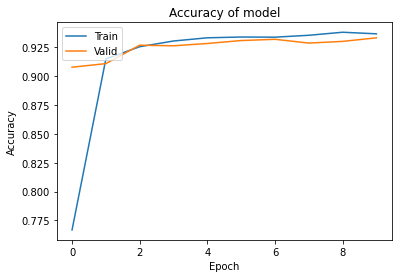

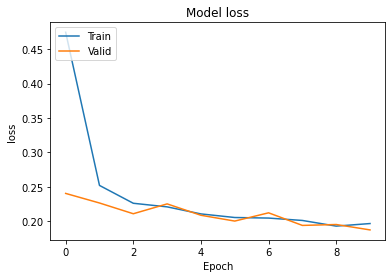

In [ ]:
plt.plot(train_attempt.history["accuracy"])
plt.plot(train_attempt.history["val_accuracy"])
plt.title("Accuracy of model")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train","Valid"],loc="upper left")
plt.show()

plt.plot(train_attempt.history["loss"])
plt.plot(train_attempt.history["val_loss"])
plt.title("Model loss")
plt.ylabel("loss")
plt.xlabel("Epoch")
plt.legend(["Train","Valid"],loc="upper left")
plt.show()

Таким образом, построенная модель классифицирует на две категории изображения с точностью ~ 0.925 - значит из 100 случаев будем получать 92-93 раз верно классифицированные категории

В качестве метрики точности была выбрана accurancy (доля верно классифицированных категорий/общее кол-во категорий)

На выходе применяется функция сигмоидная функция активации
На каждый слой, кроме выходного, используется функция активации relu